In [1]:
import json
import pandas as pd
import load_dataset as load_dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt


import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

import torch
from torch.utils.data import Dataset, DataLoader

# annotation_coco_path = "/root/dataset/anime_face_landmark_20230912/annotations/person_keypoints_Train.json"
# data_path = "/root/dataset/anime_face_landmark_20230912/images"
# dataset_list = load_dataset.cocokeypoints_list_converter(annotation_coco_path)
# training_samples, valid_samples = load_dataset.train_test_split(dataset_list,0.05)
# train_numpy_dataset = load_dataset.AugmentFaceKeypointDataset(valid_samples,data_path,3)

In [6]:
from model_tester import model_test
import sys
import importlib
import config

sys.path.append('./models')
MODEL_FILE = "resnet18"
module = importlib.import_module(MODEL_FILE)
model = module.LandmarkDetector().to(config.DEVICE)
# 白黒画像で学習したモデル
model_path = "/root/Cloud/deeplearning_results/mlruns/822573913619159784/83160e827531423ab9170affe543e425/artifacts/models/model_epoch_10000.pth"
# カラー画像で学習したモデル
# model_path = "/root/Cloud/deeplearning_results/mlruns/822573913619159784/33396b9a51f74a36b9e0a40aa109be5d/artifacts/models/model_epoch_10000.pth"

valid_image_names = [
    "images/valid_radiantLight_gitv1.5.4_0901_132440_1.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132508_0.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132534_1.jpg",
    "images/valid_radiantLight_gitv1.5.4_0901_132628_1.jpg"
    ]
# model_test(model_test(model,model_path,f"{config.DATASET_PATH}/images",valid_image_names,f"./"))

(256, 256, 3)
tensor([[0.2145, 0.4168, 0.2158, 0.4435, 0.1974, 0.5281, 0.2269, 0.5321, 0.2326,
         0.5575, 0.2361, 0.6049, 0.2448, 0.6430, 0.2867, 0.6795, 0.2701, 0.7405,
         0.3155, 0.7631, 0.3512, 0.7734, 0.3713, 0.7949, 0.3826, 0.8303, 0.4171,
         0.8623, 0.4457, 0.8649, 0.4996, 0.8800, 0.5477, 0.8904, 0.5691, 0.8631,
         0.5885, 0.8432, 0.6250, 0.8183, 0.6439, 0.7995, 0.6776, 0.7563, 0.7096,
         0.7479, 0.7326, 0.7204, 0.7382, 0.6977, 0.7385, 0.6577, 0.7708, 0.6254,
         0.7753, 0.5835, 0.7853, 0.5503, 0.7742, 0.5113, 0.7585, 0.4627, 0.7744,
         0.4266, 0.7619, 0.3944, 0.3008, 0.3538, 0.3328, 0.3182, 0.3697, 0.3169,
         0.4074, 0.3204, 0.4476, 0.3256, 0.5852, 0.3396, 0.6039, 0.3329, 0.6587,
         0.2956, 0.7011, 0.3114, 0.7290, 0.3238, 0.3172, 0.4162, 0.3678, 0.3933,
         0.4215, 0.4125, 0.3984, 0.4561, 0.3220, 0.4529, 0.6154, 0.4143, 0.6720,
         0.4040, 0.7313, 0.4394, 0.6868, 0.4487, 0.6108, 0.4684, 0.5175, 0.4079,
         0.531

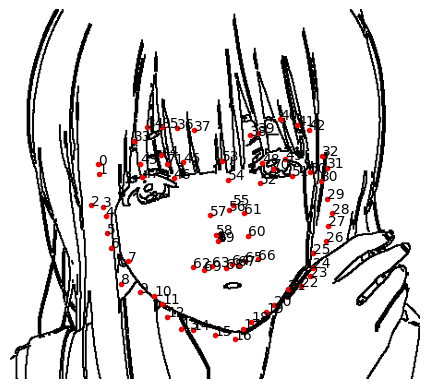

In [7]:
# def model_test(model,model_path,dataset_path,image_list,save_image_dir):
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
# for image_name in valid_image_names:
with torch.no_grad():
    # image = cv2.imread(f"/root/dataset/anime_face_landmark_20230912/images/images/AnythingV5Ink_gitv1.5.4_0901_140932_0.jpg")
    # image = cv2.imread(f"/root/source/image_convet/mizore.png") # カラー
    # image = cv2.imread(f"/root/source/image_convet/free.png") # カラー
    
    # image = cv2.imread(f"/root/source/image_convet/output_free.png") # 白黒画像
    image = cv2.imread(f"/root/source/image_convet/mizore_3.png") # 白黒画像
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    orig_image = image.copy()
    shape_y,shape_x,_ = orig_image.shape
    image = cv2.resize(image, (config.RESIZE, config.RESIZE))
    print(image.shape)
    image = image / 255.0
    image = np.transpose(image, (2, 0, 1))
    # image = np.transpose(image)
    image = torch.tensor(image, dtype=torch.float)
    image = image.unsqueeze(0).to(config.DEVICE)
    outputs = model(image)
    print(outputs)
    outputs = outputs.cpu().detach().numpy()
    outputs = outputs.reshape(-1, 2)
    # keypoints = keypoints.reshape(-1, 2)
    keypoints = outputs * [shape_x,shape_y]
    # plt.subplot(3, 4, i+1)
    plt.imshow(orig_image, cmap='gray')
    for p in range(keypoints.shape[0]):
        plt.plot(keypoints[p, 0], keypoints[p, 1], 'r.')
        plt.text(keypoints[p, 0], keypoints[p, 1], f"{p}")
    plt.axis('off')
    # image_name = image_name.replace("images/","")
    # plt.savefig(f"{save_image_dir}/valid_{image_name}")
    plt.show()
    plt.close()
